In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import re
sns.set_style('darkgrid')

In [4]:
transcripts = pd.read_csv('all_transcripts.csv', parse_dates=['date'])
transcripts.drop(['_id', '__v'], axis=1, inplace=True)

In [35]:

def standardizing_text(content):
    pattern = re.compile(r'(^|\n)[\w\s]+:')
    basic_txt = re.sub(pattern, '', content).replace('  ', ' ').replace(' .', '').lower()

    sentences = sent_tokenize(basic_txt)
    sent_tokens = [re.sub("[^A-Za-z]", ' ', sent).split() for sent in sentences]

    return sent_tokens


def avg_word_len(content):
    average = sum([len(char) for token in content for char in token]) / sum([len(sent) for sent in content])
    return round(average, 2)


def avg_sent_len(content):
    average = sum([len(token) for token in content]) / len(content)

    return round(average, 2)

def clean_tokens(sentences):
    tokens = [token for sent in sentences for token in sent]

    sw = stopwords.words('english')
    tokens_excl_sw = [word for word in tokens if word not in sw]
    tokens_pos = nltk.pos_tag(tokens_excl_sw)
    tokens_lemmatized = [WordNetLemmatizer().lemmatize(token[0], get_pos(token[1])) for token in tokens_pos]

    return tokens_lemmatized

def get_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

[['hi', 'my', 'name', 'is', 'javier'], ['what', 's', 'your', 'name'], ['i', 'd', 'had', 'the', 'opportunity', 'to', 'ran', 'today'], ['pretty', 'lady']]
['hi', 'name', 'javier', 'name', 'opportunity', 'run', 'today', 'pretty', 'lady']


In [36]:
reduced_str = transcripts['content'].apply(standardizing_text)
transcripts['clean tokens'] = reduced_str.apply(clean_tokens)
transcripts['word count'] = reduced_str.apply(lambda x: sum([len(sent) for sent in x]))
transcripts['sentence count'] = reduced_str.apply(len)
transcripts['avg word len'] = reduced_str.apply(avg_word_len)
transcripts['avg sent len'] = reduced_str.apply(avg_sent_len)
transcripts

,year,quarter,symbol,date,content,clean tokens,word count,sentence count,avg word len,avg sent len
0,2022,2,XOM,2022-07-29 14:05:42,"Operator: Good day, everyone, and welcome to t...","[good, day, everyone, welcome, exxon, mobil, c...",9337,488,4.52,19.13
1,2022,1,XOM,2022-04-29 12:24:01,"Operator: Good day, everyone, and welcome to t...","[good, day, everyone, welcome, exxon, mobil, c...",9313,433,4.49,21.51
2,2021,4,XOM,2022-02-01 12:10:03,"Operator: Good day, everyone, and welcome to t...","[good, day, everyone, welcome, exxonmobil, cor...",9312,477,4.54,19.52
3,2021,3,XOM,2021-10-29 13:50:24,Operator: Please standby. We're about to begin...,"[please, standby, begin, good, day, everyone, ...",10782,488,4.42,22.09
4,2021,2,XOM,2021-07-30 15:46:07,"Operator: Good day, everyone, and welcome to t...","[good, day, everyone, welcome, exxon, mobil, c...",10635,410,4.70,25.94
...,...,...,...,...,...,...,...,...,...,...
1684,2008,2,VLO,2008-07-30 17:00:00,Operator: Good morning. My name is Christy and...,"[good, morning, name, christy, conference, ope...",10046,529,4.37,18.99
1685,2008,1,VLO,2008-04-30 17:00:00,Operator: Good morning my name is Rebecca and ...,"[good, morning, name, rebecca, conference, ope...",4281,225,4.54,19.03
1686,2007,4,VLO,2008-01-29 17:00:00,Operator: Good morning. My name is Christie an...,"[good, morning, name, christie, conference, op...",7549,464,4.45,16.27
1687,2007,3,VLO,2007-11-06 17:00:00,Operator: Good morning. My name is Dennis and ...,"[good, morning, name, dennis, yourconference, ...",7339,396,4.71,18.53


In [44]:
round(transcripts[['word count', 'sentence count', 'avg word len', 'avg sent len']].describe(), 2)

,word count,sentence count,avg word len,avg sent len
count,1689.00,1689.00,1689.00,1689.00
mean,8276.28,439.75,4.61,19.15
std,2162.54,127.62,0.15,2.86
min,1765.00,79.00,4.19,12.87
25%,7033.00,360.00,4.50,17.21
50%,8334.00,432.00,4.61,18.85
75%,9394.00,506.00,4.71,20.61
max,26322.00,1258.00,5.29,38.49


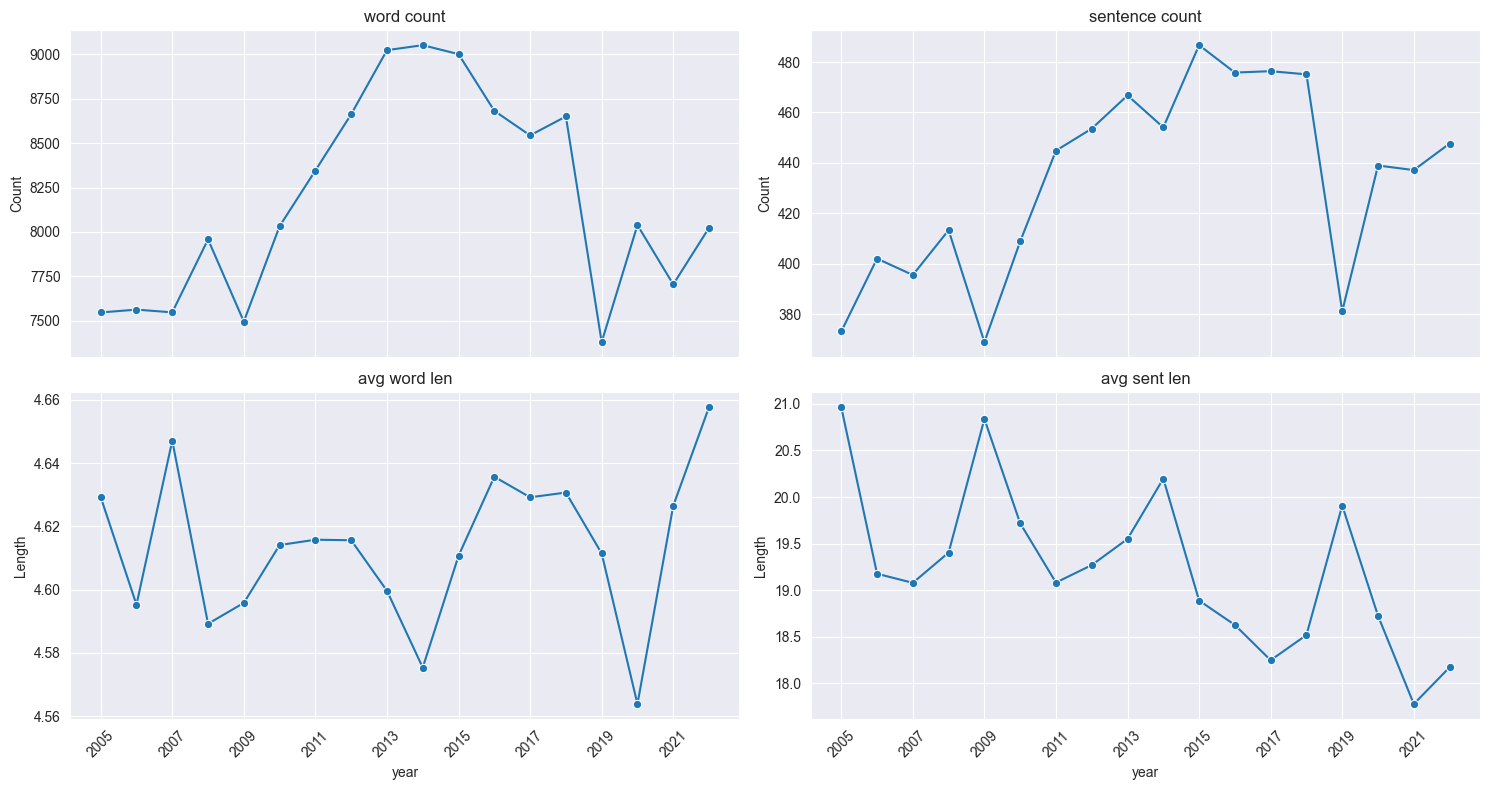

In [45]:
years = transcripts.groupby('year')[['word count', 'sentence count', 'avg word len', 'avg sent len']].mean()

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(15, 8))

for ax, col in zip(axes.flat, years.columns):
    sns.lineplot(x=years.index, y=col, data=years, marker='o', ax=ax)
    ax.set_xticks(years.index[::2])
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title(col)

    if 'len' in col:
        ax.set_ylabel('Length')
    else:
        ax.set_ylabel('Count')


plt.tight_layout()
plt.show()